In [7]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Code for linear regression

def mean(values):
    return sum(values) / float(len(values))

def variance(values, mean_value):
    return sum((x - mean_value)**2 for x in values)

def covariance(x_values, x_mean, y_values, y_mean):
    covar = 0.0
    for i in range(len(x_values)):
        covar += (x_values[i] - x_mean) * (y_values[i] - y_mean)
    return covar

def coefficients(dataset):
    x_values = [row[0] for row in dataset]
    y_values = [row[1] for row in dataset]
    x_mean, y_mean = mean(x_values), mean(y_values)
    b1 = covariance(x_values, x_mean, y_values, y_mean) / variance(x_values, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

def linear_regression(dataset):
    b0, b1 = coefficients(dataset)
    print(f'Slope: {b1}, Intercept: {b0}')
    x_values = [row[0] for row in dataset]
    y_values = [row[1] for row in dataset]
    x_mean, y_mean = mean(x_values), mean(y_values)
    print(f'Mean of X: {x_mean}, Mean of Y: {y_mean}')
    print(f'Variance of X: {variance(x_values, x_mean)}, Variance of Y: {variance(y_values, y_mean)}')
    t_half = (y_values[0]/2 - b0)/b1
    print("half time is:",t_half)
    
    var =[]
    for i in range(len(x_values)):
        variat = ((b0 + b1 * x_values[i]) - y_mean)**(2)/y_mean
        var.append(variat)
    
    
    # Plotting the actual points
    plt.scatter(x_values, y_values, color='blue')
    # Plotting the regression line
    predicted_y_values = [b0 + b1 * x for x in x_values]
    plt.plot(x_values, predicted_y_values, color='red')
    plt.title("Linear regression")
    plt.axvline(x=t_half, color='g', linestyle='dashed', label='Green Line')
    plt.legend()
    plt.show()
    return var



Slope: -0.5822100670703914, Intercept: 104.55740053395846
Mean of X: 67.6, Mean of Y: 65.2
Variance of X: 18428.4, Variance of Y: 6857.6
half time is: 88.5546359467621


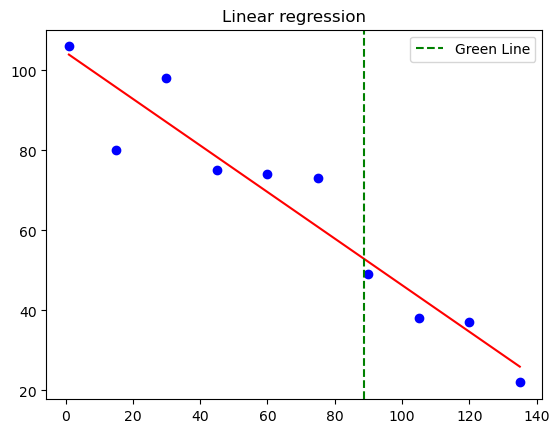

In [33]:
# Import the data
x_plot, y_plot,var_plot = [], [],[]
with open('assign2fit.txt', 'r') as f:
    for line in f:
        row = line.split()
        x_plot.append(float(row[0]))  # Convert to float if needed
        y_plot.append(float(row[1]))
        var_plot.append(float(row[2]))

# Test the function
# Prepare the dataset
dataset = list(zip(x_plot, y_plot))
var = linear_regression(dataset)

# CHi characteristics

In [36]:
def chi_sq(X_data_chi):
    print("Hypothesis: The distribution is normal.\n")
# Total number of students
    observation_chi = copy.deepcopy(X_data_chi)
    Total_sum = sum(observation_chi)
    mean_data_chi = sum(X_data_chi) / len(X_data_chi)
    print(f"The mean of the data is: {mean_data_chi}")
    print()

# Expected distribution (assuming standard normal)
    expected_chi = [10,9,10,9,8,8,7,6,6,5]
    print("Expected distribution is: ",expected_chi)
    print()

# Calculate chi-square statistic
    chi_square_stat = sum((obs - exp) ** 2 / exp for obs, exp in zip(observation_chi, expected_chi))

# Degrees of freedom is 5 - 1 = 4
    df = 9
    print("Degrees of freedom: ",df)
    print()

    print(f"Critical value at 5% level of significance for degrees of freedom = {df} is 16.915\n")
    print("Chi-square statistic:", chi_square_stat)
    print()
    print("The hypothesis is true if the chi - square characteristics is less than critical value")
    print()
    print("CONCLUSION: The distribution is", "not taken from linear regression" if chi_square_stat > 16.915 else "normal", "at 5% level of significance.\n")
#     print("CONCLUSION: The distribution is", "not normal" if chi_square_stat > 7.779 else "normal", "at 10% level of significance.")

In [37]:
# Observed distribution of students

chi_sq(var)

Hypothesis: The distribution is normal.

The mean of the data is: 9.580748852165096

Expected distribution is:  [10, 9, 10, 9, 8, 8, 7, 6, 6, 5]

Degrees of freedom:  9

Critical value at 5% level of significance for degrees of freedom = 9 is 16.915

Chi-square statistic: 124.06218921422439

The hypothesis is true if the chi - square characteristics is less than critical value

CONCLUSION: The distribution is not taken from linear regression at 5% level of significance.

